In [65]:
import pandas as pd
from scipy.stats import linregress
import matplotlib.pyplot as plt

### Tasks to be completed:

#### 1. create a scatter plot using the Year column as the x-axis and the CSIRO Adjusted Sea Level column as the y-axis.
#### 2. Use the linregress function from scipy.stats to get the slope and y-intercept of the line of best fit. Plot the line of best fit over the top of the scatter plot. Make the line go through the year 2050 to predict the sea level rise in 2050.
#### 3. Plot a new line of best fit just using the data from year 2000 through the most recent year in the dataset. Make the line also go through the year 2050 to predict the sea level rise in 2050 if the rate of rise continues as it has since the year 2000.
#### 4. The x label should be Year, the y label should be Sea Level (inches), and the title should be Rise in Sea Level.


In [66]:
df = pd.read_csv('sea_level.csv')
df

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN
...,...,...,...,...,...
129,2009,8.586614,8.311024,8.862205,8.046354
130,2010,8.901575,8.618110,9.185039,8.122973
131,2011,8.964567,8.661417,9.267717,8.053065
132,2012,9.326772,8.992126,9.661417,8.457058


In [67]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      134 non-null    int64  
 1   CSIRO Adjusted Sea Level  134 non-null    float64
 2   Lower Error Bound         134 non-null    float64
 3   Upper Error Bound         134 non-null    float64
 4   NOAA Adjusted Sea Level   21 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 5.4 KB


In [68]:
df.describe()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
count,134.000000,134.000000,134.000000,134.000000,21.000000
mean,1946.500000,3.650341,3.204666,4.096016,7.363746
std,38.826537,2.485692,2.663781,2.312581,0.691038
min,1880.000000,-0.440945,-1.346457,0.464567,6.297493
25%,1913.250000,1.632874,1.078740,2.240157,6.848690
50%,1946.500000,3.312992,2.915354,3.710630,7.488353
75%,1979.750000,5.587598,5.329724,5.845472,7.907365
max,2013.000000,9.326772,8.992126,9.661417,8.546648


### 1. Scatter Plot

Text(0, 0.5, 'CSIRO Adjusted Sea Level')

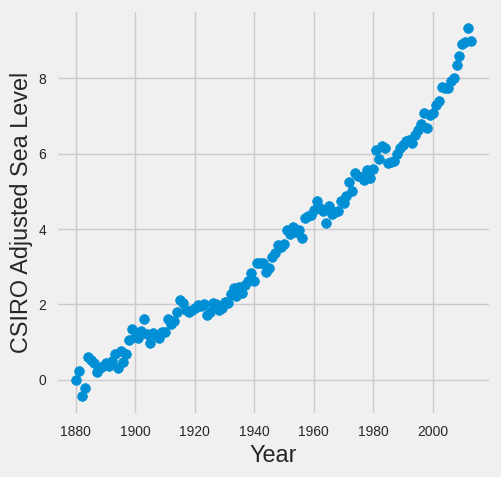

In [69]:
plt.style.use('fivethirtyeight')

x = df['Year']
y = df['CSIRO Adjusted Sea Level']
fig, ax = plt.subplots(figsize = (5, 5))
ax = plt.scatter(x, y)
plt.xlabel('Year')
plt.ylabel('CSIRO Adjusted Sea Level')

### 2.  Use the linregress function from scipy.stats to get the slope and y-intercept of the line of best fit. Plot the line of best fit over the top of the scatter plot. Make the line go through the year 2050 to predict the sea level rise in 2050.


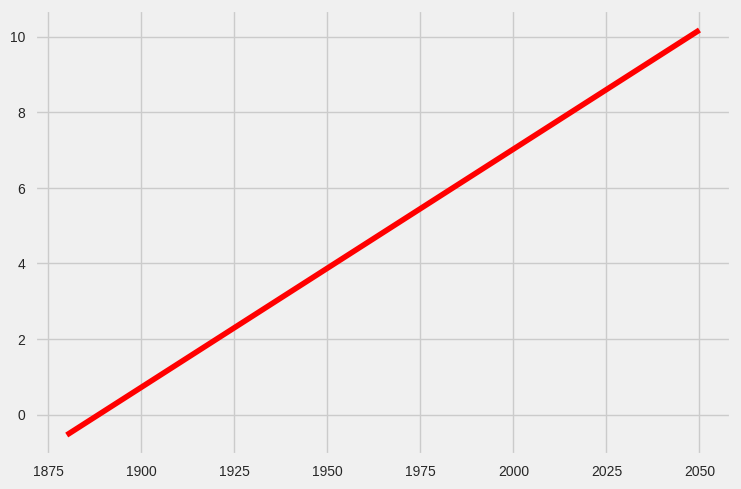

In [70]:
# getting the slope and intercepting using the linregress function
slope, intercept, r_value, p_value, stderr = linregress(x, y)

#Setting new x and y valuables 
x_predict = pd.Series([i for i in range(1880,2051)])
y_predict = slope * x_predict + intercept

plt.plot(x_predict, y_predict, 'r')

#### 3. Plot a new line of best fit just using the data from year 2000 through the most recent year in the dataset. Make the line also go through the year 2050 to predict the sea level rise in 2050 if the rate of rise continues as it has since the year 2000.

In [71]:
# setting a new data range: form year 2000
df_forecast = df.loc[df['Year'] >= 2000]

# Setting the new x and y columns for the required plot.
x_forecast = df_forecast['Year']
y_forecast = df_forecast['CSIRO Adjusted Sea Level']
df_forecast

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
120,2000,7.062992,6.791339,7.334646,6.920582
121,2001,7.287402,7.019685,7.555118,7.087460
122,2002,7.381890,7.110236,7.653543,7.319698
123,2003,7.759843,7.484252,8.035433,7.488353
124,2004,7.740157,7.464567,8.015748,7.507933
125,2005,7.744094,7.472441,8.015748,7.644563
126,2006,7.917323,7.645669,8.188976,7.697420
127,2007,7.996063,7.712598,8.279528,7.702147
128,2008,8.350394,8.078740,8.622047,7.907365
129,2009,8.586614,8.311024,8.862205,8.046354


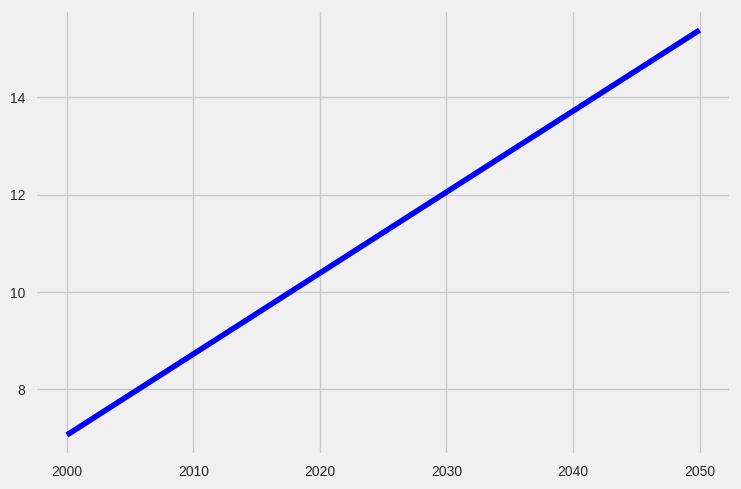

In [72]:
#Getting th new slope + intercept from the new range of data created (2000 - 2050)
slope, intercept, rvalue, pvalue, stderr = linregress (x_forecast, y_forecast)

#Setting new x and y valuables  for a new plot
x_predict2 = pd.Series([i for i in range(2000,2051)])
y_predict2 = slope * x_predict2 + intercept

#creating a lineplot using the new x and y valuables
plt.plot(x_predict2, y_predict2, 'blue')

#### 4. Combining all Plots.  

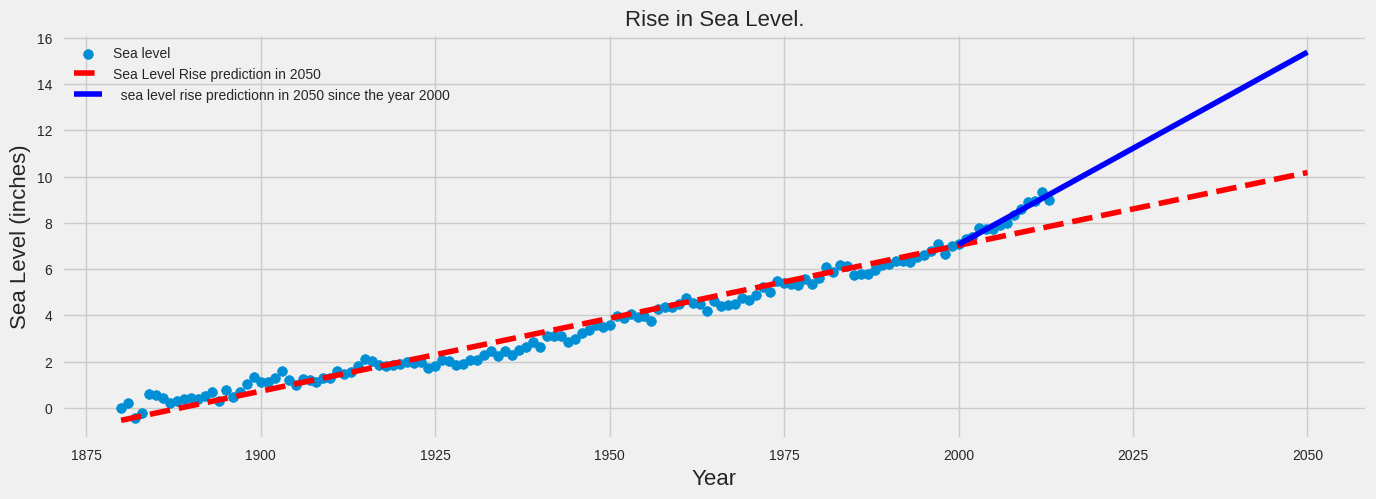

In [73]:
plt.style.use('fivethirtyeight')

# Scatter plot
fig, ax = plt.subplots(figsize =(15, 5))
ax = plt.scatter(x = df['Year'], y = df['CSIRO Adjusted Sea Level'], label= 'Sea level')

#2nd lineplot
plt.plot(x_predict, y_predict, 'r', linestyle ='--', label = 'Sea Level Rise prediction in 2050')

#3rd lineplot 
plt.plot(x_predict2, y_predict2, 'blue', label ='  sea level rise predictionn in 2050 since the year 2000')

plt.title('Rise in Sea Level.', fontsize = 16)
plt.xlabel('Year',fontsize = 16)
plt.ylabel('Sea Level (inches)',fontsize = 16)
plt.legend ()